In [11]:
import authClient

ModuleNotFoundError: No module named 'authClient'

In [12]:
import authClient as ac

ModuleNotFoundError: No module named 'authClient'

In [55]:
from dl import authClient as ac

In [56]:
from dl import queryClient as qc

In [57]:
from dl import storeClient as sc

In [58]:
from dl import helpers 

In [59]:
token=ac.login('mgkadrmas')

In [60]:
ra=84.0
dec=-64.0
rad=0.5

In [61]:
res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(rad)+')')
df=helpers.utils.convert(res,'table')

In [62]:
print(df['pmra'])

      pmra     
---------------
  4.82227329193
 0.941624808195
 0.713898491078
  1.44862904253
  2.21457956896
   1.6379511735
            nan
  3.30247119096
  1.63867747664
-0.144953262109
            ...
            nan
  1.74051309597
 0.995689753971
 0.829104594613
  1.45808868925
            nan
  2.53555524084
   7.1549806519
  2.88015881599
  1.45206826305
  5.00363314323
Length = 88605 rows


In [63]:
df.colnames

['solution_id',
 'source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'radius_val',
 'radius_percentile_lower',
 'radius_percentile_upper',
 'lum_val',
 'lum_percentile_lower',
 'lum_percentile_upper',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_sigma5d_max',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_flux_over_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_m

In [64]:
import pylab as plt

In [65]:
%matplotlib inline

In [66]:
import scipy.stats as stats

In [67]:
help(stats.binned_statistic_2d)

Help on function binned_statistic_2d in module scipy.stats._binned_statistic:

binned_statistic_2d(x, y, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)
    Compute a bidimensional binned statistic for one or more sets of data.
    
    This is a generalization of a histogram2d function.  A histogram divides
    the space into bins, and returns the count of the number of points in
    each bin.  This function allows the computation of the sum, mean, median,
    or other statistic of the values (or set of values) within each bin.
    
    Parameters
    ----------
    x : (N,) array_like
        A sequence of values to be binned along the first dimension.
    y : (N,) array_like
        A sequence of values to be binned along the second dimension.
    values : (N,) array_like or list of (N,) array_like
        The data on which the statistic will be computed.  This must be
        the same shape as `x`, or a list of sequences - each with the same
        shape as

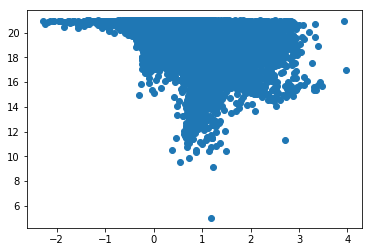

In [68]:
plt.scatter(df['bp_rp'].data,df['phot_g_mean_mag'])

In [69]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA seque

In [70]:
import numpy as np

In [71]:
x=np.arange(-1,3,0.01)

In [72]:
x.size

400

In [73]:
y=-5.0*x+10

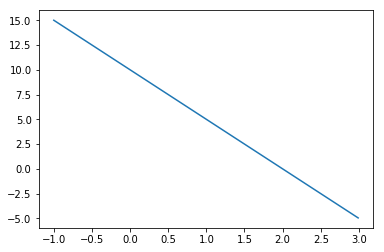

In [74]:
plt.plot(x,y)

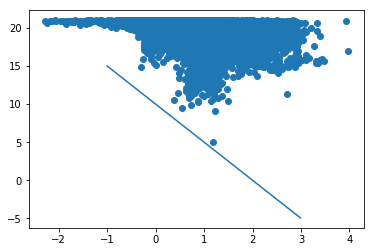

In [75]:
plt.scatter(df['bp_rp'].data,df['phot_g_mean_mag'])
plt.plot(x,y)

In [76]:
good = (df['bp_rp'].data>=0.92)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [77]:
good

array([False, False, False, ...,  True,  True, False], dtype=bool)

In [78]:
good = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [79]:
len(good)

88605

In [80]:
np.sum(good)

8424

In [81]:
print(df['pmra'][good])

     pmra    
-------------
1.90612246436
2.25377592257
1.77636487722
1.60889260289
 1.2933384476
1.40980699121
1.82683786794
1.85743497595
2.05490192804
1.44323129277
          ...
1.47798660903
 1.6749617041
2.34865589836
2.69229119745
1.59428012844
2.92994218619
2.44076226073
2.27404627345
2.98334181507
1.87706332107
1.74051309597
Length = 8424 rows


In [82]:
medpmra=np.median(df['pmra'][good])
medpmdec=np.median(df['pmdec'][good])
print(medpmra)
print(medpmdec)

1.52957314827
0.476046208506


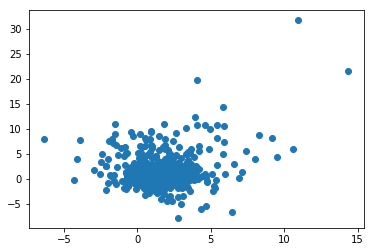

In [83]:
plt.scatter(df['pmra'][good], df['pmdec'][good])

In [84]:
good.size

88605

In [85]:
np.sum(good)

8424

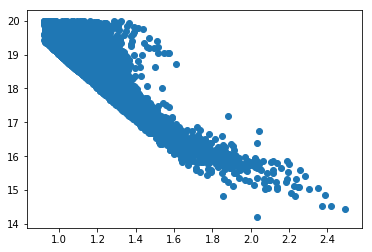

In [86]:
plt.scatter(df['bp_rp'][good], df['phot_g_mean_mag'][good])

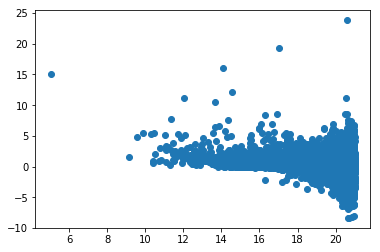

In [87]:
plt.scatter(df['phot_g_mean_mag'], df['parallax'])

In [88]:
pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)

In [96]:
print(pndist)

     pmra     
--------------
 7.82093075801
0.610199018845
0.831834745129
0.481427211167
0.772245971515
 0.95131528213
           nan
  5.7685852773
0.747428667134
 6.31704974802
           ...
           nan
 0.85864005265
0.537616749182
 1.32065209977
 0.26622321273
           nan
 1.19647827461
 5.79947654889
 1.35903729604
 2.23319804469
 3.63794312551
Length = 88605 rows


In [90]:
good = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [97]:
np.sum(good)

6061

In [92]:
np.median(df['parallax'][good])

-0.0063871788274025999

In [93]:
print(1/np.median(df['parallax'][good]))

-156.563645237


min ra= 67, max ra= 90; min dec= -76, max dec= -65; steps of 1 degree 
function should print ra and dec, number of good points, the median paralax
2 loops, outer for ra and inner for dec 
put on github 
git add 
git commit
git push 
mv move directory 
../projects/LMC-Paralax

In [95]:
def LMCParallax('ra','dec','rad')
    for 'ra' in range (67,90):
        for 'dec' in range (-76,-65):
            good = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)
            

SyntaxError: invalid syntax (<ipython-input-95-521544a7528b>, line 1)